In [1]:
c = lambda f: 5/9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
print(temps)


[(0, -17.77777777777778), (10, -12.222222222222223), (20, -6.666666666666667), (30, -1.1111111111111112), (40, 4.444444444444445), (50, 10.0), (60, 15.555555555555557), (70, 21.11111111111111), (80, 26.666666666666668), (90, 32.22222222222222), (100, 37.77777777777778)]


 Part 1: Chart a Straight Line

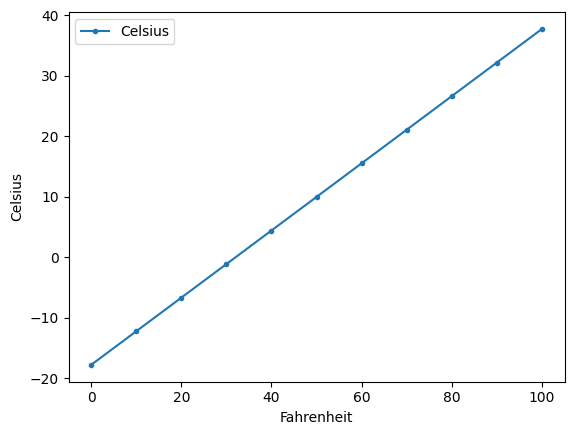

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

# to create the list of temperatures
c = lambda f: 5/9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

# to crreate the DataFrame
temp_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

# plotting the data
axes = temp_df.plot(x='Fahrenheit', y='Celsius', style='.-')

# setting the y-axis label
y_label = axes.set_ylabel('Celsius')


Part 2: Predict Avg High Temp in NYC in Jan

Section 1 - Data Acquisition

In [17]:
# Step 1: Importing required libraries
import pandas as pd

# Step 2: loading the CSV data into a DataFrame
csv_file_path = "C:/RaginiWorkArea/sourcecode/datafun-07-ml_1/ave_hi_nyc_jan_1895-2018.csv"  # Forward slashes
nyc_df = pd.read_csv(csv_file_path)

# display the first few rows of the DataFrame to verify
print(nyc_df.head())


     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0


Section 2 - Data Inspection

In [6]:
# Step 1: Importing the required libraries
import pandas as pd

# Step 2: loading the CSV data into a DataFrame
csv_file_path = "C:/RaginiWorkArea/sourcecode/datafun-07-ml_1/ave_hi_nyc_jan_1895-2018.csv"  # Corrected path
nyc_df = pd.read_csv(csv_file_path)

# Step 3: to view the first few rows of the DataFrame
print("Head of the DataFrame:")
print(nyc_df.head())

# Step 4: to view the last few rows of the DataFrame
print("Tail of the DataFrame:")
print(nyc_df.tail())


Head of the DataFrame:
     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0
Tail of the DataFrame:
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


Section 3 - Data Cleaning

In [7]:
# Step 1: To import the required libraries
import pandas as pd

# Step 2: loading the CSV data into a DataFrame
csv_file_path = "C:/RaginiWorkArea/sourcecode/datafun-07-ml_1/ave_hi_nyc_jan_1895-2018.csv"  # Corrected path
nyc_df = pd.read_csv(csv_file_path)

# Step 3: cleaning up column names
nyc_df.columns = ["Date", "Temperature", "Anomaly"]  # Rename columns for clarity

# Step 4: cleaning up the date series
# to convert the 'Date' column to datetime format
nyc_df['Date'] = pd.to_datetime(nyc_df['Date'], format='%Y%m')  # Assuming the date is in format 'YYYYMM'

# displaying the cleaned DataFrame
print("Cleaned DataFrame:")
print(nyc_df.head())


Cleaned DataFrame:
        Date  Temperature  Anomaly
0 1895-01-01         34.2     -3.2
1 1896-01-01         34.7     -2.7
2 1897-01-01         35.5     -1.9
3 1898-01-01         39.6      2.2
4 1899-01-01         36.4     -1.0


Section 4 - Descriptive Statistics

In [8]:
# Step 1: To import the required libraries
import pandas as pd

# Step 2: to set the display precision to 2 decimal places
pd.set_option('display.precision', 2)

# Step 3: to load the CSV data into a DataFrame
csv_file_path = "C:/RaginiWorkArea/sourcecode/datafun-07-ml_1/ave_hi_nyc_jan_1895-2018.csv"  
nyc_df = pd.read_csv(csv_file_path)

# Step 4: cleaning up column names
nyc_df.columns = ["Date", "Temperature", "Anomaly"] 

# Step 5: cleaning up the date series
# Convert the 'Date' column to datetime format
nyc_df['Date'] = pd.to_datetime(nyc_df['Date'], format='%Y%m')  # in format 'YYYYMM'

# Step 6: calculate basic descriptive statistics
descriptive_stats = nyc_df.describe()

# displaying descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
                                Date  Temperature  Anomaly
count                            124       124.00   124.00
mean   1956-07-02 01:09:40.645161280        37.60     0.20
min              1895-01-01 00:00:00        26.10   -11.30
25%              1925-10-01 18:00:00        34.58    -2.82
50%              1956-07-02 00:00:00        37.60     0.20
75%              1987-04-02 06:00:00        40.60     3.20
max              2018-01-01 00:00:00        47.60    10.20
std                              NaN         4.54     4.54


Section 5 - Build the Model

In [11]:
# Step 1: To import the required libraries
import pandas as pd
from scipy.stats import linregress

# Step 2: loading the CSV data into a DataFrame
csv_file_path = "C:/RaginiWorkArea/sourcecode/datafun-07-ml_1/ave_hi_nyc_jan_1895-2018.csv" 
nyc_df = pd.read_csv(csv_file_path)

# Step 3: cleaning up column names
nyc_df.columns = ["Date", "Temperature", "Anomaly"] 

# Step 4: cleaning up the date series
# to convert the 'Date' column to datetime format
nyc_df['Date'] = pd.to_datetime(nyc_df['Date'], format='%Y%m')  #in format 'YYYYMM'

# Step 5: converting 'Date' column to numerical 
start_date = nyc_df['Date'].min() 
nyc_df['Days'] = (nyc_df['Date'] - start_date).dt.days

# Step 6: to calculate slope and intercept for the best fit line
slope, intercept, _, _, _ = linregress(nyc_df['Days'], nyc_df['Temperature'])

# displaying the calculated slope and intercept
print("Slope:", slope)
print("Intercept:", intercept)


Slope: 4.044230640227034e-05
Intercept: 36.686744247029


Section 6 - Predict

In [12]:
# Step 1: To calculate the number of days since the start date for the year 2024
year_2024 = pd.to_datetime('2024-01-01')  # Start of 2024
days_2024 = (year_2024 - start_date).days

# Step 2: using the linear regression equation to predict the average high temperature for 2024
predicted_temp_2024 = slope * days_2024 + intercept

# to display the predicted temperature for 2024
print("Predicted average high temperature in January 2024:", predicted_temp_2024)


Predicted average high temperature in January 2024: 38.59222395547837


Section 7 - Visualizations


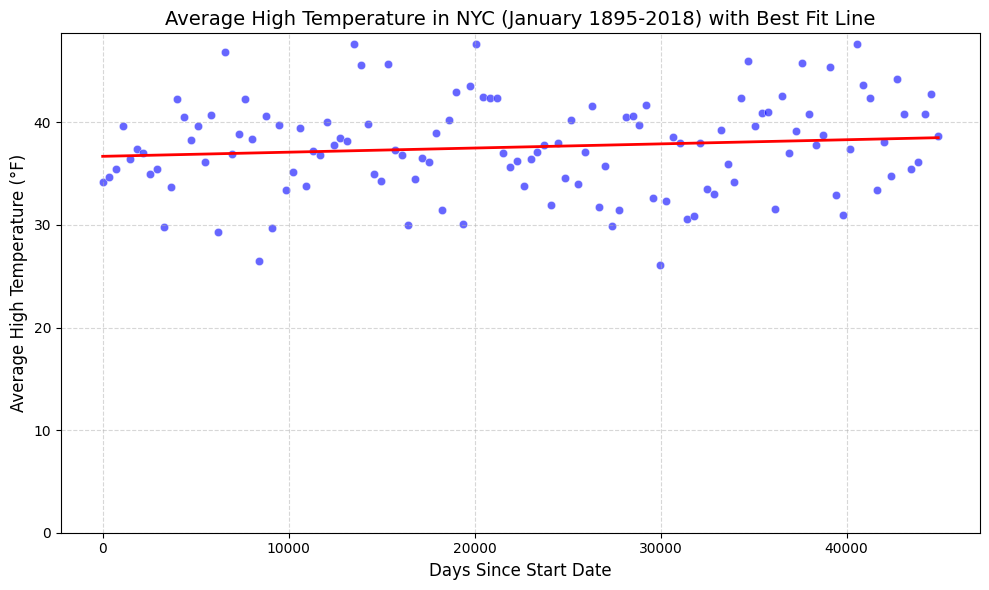

In [14]:
# Step 1: To import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Step 2: loading CSV data into a DataFrame
csv_file_path = "C:/RaginiWorkArea/sourcecode/datafun-07-ml_1/ave_hi_nyc_jan_1895-2018.csv"  
nyc_df = pd.read_csv(csv_file_path)

# Step 3: cleaning up column names
nyc_df.columns = ["Date", "Temperature", "Anomaly"] 

# Step 4: cleaning up the date series
# Convert the 'Date' column to datetime format
nyc_df['Date'] = pd.to_datetime(nyc_df['Date'], format='%Y%m')  # in format 'YYYYMM'

# Step 5: converting 'Date' column to numerical representation (days since the start date)
start_date = nyc_df['Date'].min()  
nyc_df['Days'] = (nyc_df['Date'] - start_date).dt.days

# Step 6: calculating the slope and intercept for the best fit line
slope, intercept, _, _, _ = linregress(nyc_df['Days'], nyc_df['Temperature'])

# Step 7: to generate the scatter plot with a best fit line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days', y='Temperature', data=nyc_df, color='blue', alpha=0.6)
plt.plot(nyc_df['Days'], slope * nyc_df['Days'] + intercept, color='red', linewidth=2)  # Plot the best fit line

# Step 8: setting axes labels and title
plt.xlabel('Days Since Start Date', fontsize=12)
plt.ylabel('Average High Temperature (°F)', fontsize=12)
plt.title('Average High Temperature in NYC (January 1895-2018) with Best Fit Line', fontsize=14)

# Step 9: to set y-scale to start from 0
plt.ylim(0, None)

# Step 10: to customize gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Step 11: show the plot
plt.tight_layout()
plt.show()


Part 3: Predict Avg High Temp in NYC in January with the use of scikit-learn estimator.

Section 1 - Data Acquisition

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
csv_file_path = "C:/RaginiWorkArea/sourcecode/datafun-07-ml_1/ave_hi_nyc_jan_1895-2018.csv"  # Corrected path
df = pd.read_csv(csv_file_path)

# Clean up column names
df.columns = ["Date", "Temperature", "Anomaly"]

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')

# Convert 'Date' column to numerical representation (days since the start date)
start_date = df['Date'].min()  # Get the minimum date in the 'Date' column
df['Days'] = (df['Date'] - start_date).dt.days

# Inspect the data
print("Head of the DataFrame:")
print(df.head())

print("\nTail of the DataFrame:")
print(df.tail())


Head of the DataFrame:
        Date  Temperature  Anomaly  Days
0 1895-01-01         34.2     -3.2     0
1 1896-01-01         34.7     -2.7   365
2 1897-01-01         35.5     -1.9   731
3 1898-01-01         39.6      2.2  1096
4 1899-01-01         36.4     -1.0  1461

Tail of the DataFrame:
          Date  Temperature  Anomaly   Days
119 2014-01-01         35.5     -1.9  43464
120 2015-01-01         36.1     -1.3  43829
121 2016-01-01         40.8      3.4  44194
122 2017-01-01         42.8      5.4  44560
123 2018-01-01         38.7      1.3  44925


Section 2 - Data Inspection

In [7]:
# Split the data into training and testing sets
X = df[['Days']]  # Features
y = df['Temperature']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of each dataset
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (99, 1)
X_test shape: (25, 1)
y_train shape: (99,)
y_test shape: (25,)


Section 3 - Model Training

In [8]:
# Train the model using Linear Regression Fit
model = LinearRegression()
model.fit(X_train, y_train)

# View the returned coef_ and intercept_ attributes needed for the line equation (y = mx + b)
print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Coefficient (slope): 3.2889665304364324e-05
Intercept: 36.5583239489123


Section 4 - Model Testing

In [9]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 21.714297688452493
R-squared: -0.06673049514659968


Section 5 - Prediction

In [10]:
# Predict the average high temperature in January 2024
year_2024 = pd.to_datetime('2024-01-01')  # Start of 2024
days_2024 = (year_2024 - start_date).days
predicted_temp_2024 = model.predict([[days_2024]])

print("Predicted average high temperature in January 2024:", predicted_temp_2024[0])


Predicted average high temperature in January 2024: 38.107953419392736


c:\RaginiWorkArea\sourcecode\datafun-07-ml_1\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Section 6 - Visualization

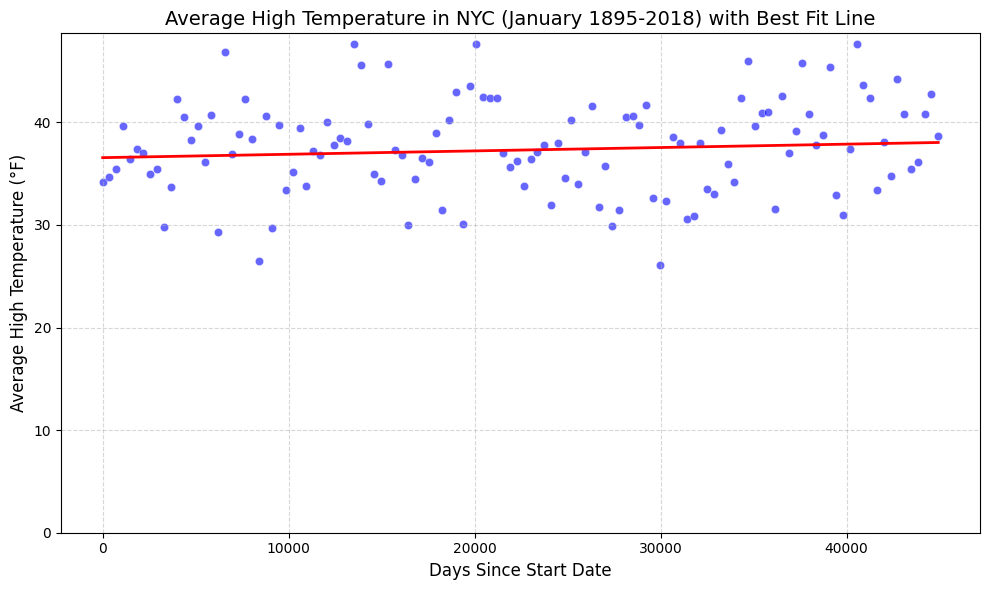

In [11]:
# Generate the scatter plot with a best fit line using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days', y='Temperature', data=df, color='blue', alpha=0.6)
plt.plot(df['Days'], model.predict(df[['Days']]), color='red', linewidth=2)  # Plot the best fit line

# Set axes labels and title
plt.xlabel('Days Since Start Date', fontsize=12)
plt.ylabel('Average High Temperature (°F)', fontsize=12)
plt.title('Average High Temperature in NYC (January 1895-2018) with Best Fit Line', fontsize=14)

# Set y-scale to start from 0
plt.ylim(0, None)

# Customize gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()
